In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import pickle
import warnings
warnings.filterwarnings('ignore')


# **Data Load**

In [ ]:
df = pd.read_csv('/content/Global Economy Indicators.csv')
df.head()


,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


In [ ]:
df.describe()


,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,58.056228,67.242515,56.829401,50.360299,54.468024,53.013653,54.791677,55.019701,51.568683,69.803293,68.624910,58.723772,56.231737
std,13.309964,17.542279,19.914638,17.747092,10.350639,16.743723,12.876166,15.849004,13.427811,19.752677,11.166266,19.679023,9.061262
min,30.400000,16.540000,16.160000,13.090000,23.010000,21.690000,20.500000,24.230000,24.460000,19.210000,31.950000,16.780000,33.670000
25%,47.770000,59.290000,39.650000,37.470000,47.820000,40.765000,45.830000,40.055000,41.295000,55.830000,60.595000,44.355000,50.265000
50%,57.530000,68.930000,57.170000,47.510000,54.390000,51.250000,53.520000,56.590000,50.060000,74.770000,71.380000,61.930000,55.540000
75%,66.860000,80.560000,72.865000,60.965000,60.610000,64.640000,62.760000,69.060000,62.555000,86.975000,77.340000,74.130000,61.940000
max,84.550000,96.320000,94.100000,90.410000,82.560000,84.990000,83.840000,85.750000,80.100000,95.860000,86.890000,91.440000,78.740000


In [ ]:
df.isnull().sum()

,0
Country,0
AveragScore,0
SafetySecurity,0
PersonelFreedom,0
Governance,0
SocialCapital,0
InvestmentEnvironment,0
EnterpriseConditions,0
MarketAccessInfrastructure,0
EconomicQuality,0


In [ ]:
df.dropna().sum()

,0
Country,Denmark Sweden Norway Finland Switzerland Ne...
AveragScore,9695.39
SafetySecurity,11229.5
PersonelFreedom,9490.51
Governance,8410.17
SocialCapital,9096.16
InvestmentEnvironment,8853.28
EnterpriseConditions,9150.21
MarketAccessInfrastructure,9188.29
EconomicQuality,8611.97


# **Data Preprocessing**

In [ ]:

# Drop AveragScore
features = ['SafetySecurity', 'PersonelFreedom', 'Governance',
           'SocialCapital', 'InvestmentEnvironment', 'EnterpriseConditions',
           'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions',
           'Health', 'Education', 'NaturalEnvironment']
X = df[features]

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1', 'principal component 2'])


# PCA

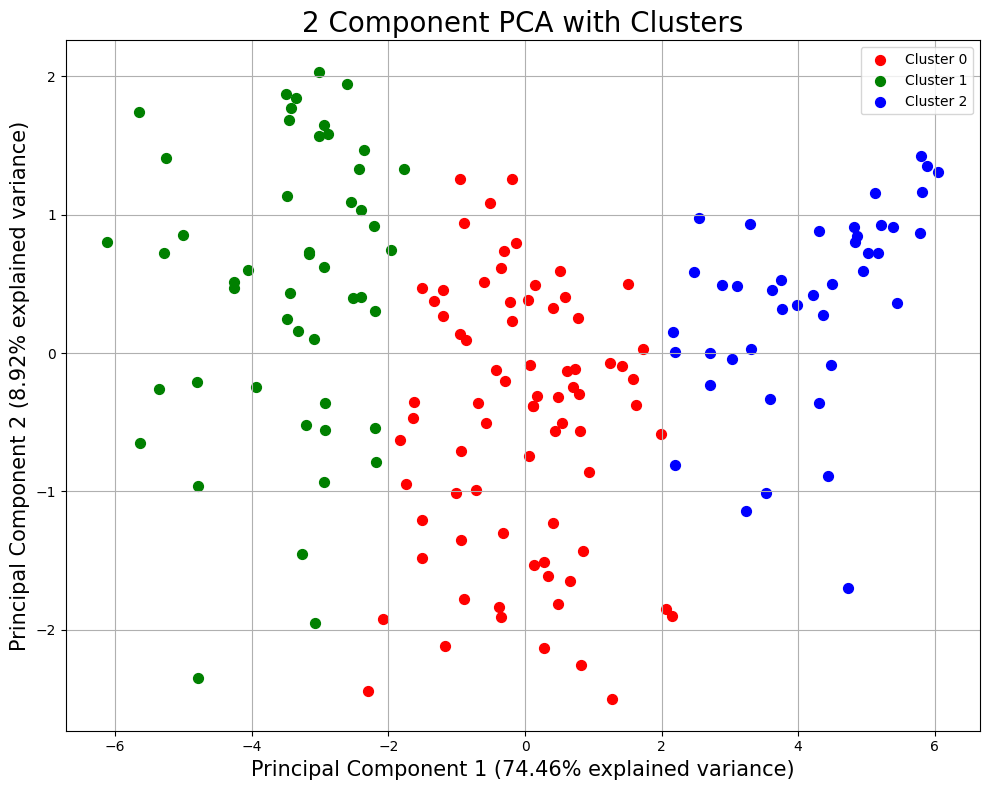

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# 5. Add cluster labels to the principal components DataFrame
finalDf = pd.concat([principalDf, pd.Series(cluster_labels, name='Cluster')], axis=1)

# 6. Visualize the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA with Clusters', fontsize=20)

# Define targets and colors for each cluster
targets = [0, 1, 2]  # Cluster labels
colors = ['r', 'g', 'b']  # Colors for each cluster

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
              finalDf.loc[indicesToKeep, 'principal component 2'],
              c=color,
              s=50,
              label=f'Cluster {target}')

ax.legend()
ax.grid()

# Add explained variance ratio to the plot
explained_var = pca.explained_variance_ratio_
plt.xlabel(f'Principal Component 1 ({explained_var[0]:.2%} explained variance)')
plt.ylabel(f'Principal Component 2 ({explained_var[1]:.2%} explained variance)')

plt.tight_layout()
plt.show()



Cluster 0 (Merah): Terletak di tengah grafik, menunjukkan negara-negara dengan karakteristik ekonomi menengah

Cluster 1 (Hijau): Berada di sebelah kiri grafik, kemungkinan merepresentasikan negara-negara dengan tantangan ekonomi yang lebih besar

Cluster 2 (Biru): Terletak di sebelah kanan grafik, mungkin menunjukkan negara-negara dengan ekonomi yang lebih majupengembangan

In [ ]:
feature_weights = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print("\nKontribusi Fitur to principal components:")
print(feature_weights)

# Calculate total explained variance
total_var = sum(explained_var)
print(f"\nTotal explained variance: {total_var:.2%}")


Kontribusi Fitur to principal components:
                                 PC1       PC2
SafetySecurity              0.274123  0.116032
PersonelFreedom             0.249878  0.525105
Governance                  0.308145  0.216966
SocialCapital               0.258553  0.174774
InvestmentEnvironment       0.318330 -0.049310
EnterpriseConditions        0.297441  0.058728
MarketAccessInfrastructure  0.316903 -0.213694
EconomicQuality             0.305678 -0.120604
LivingConditions            0.298465 -0.325212
Health                      0.284888 -0.373726
Education                   0.304402 -0.275717
NaturalEnvironment          0.232466  0.495616

Total explained variance: 83.39%


PC1 mungkin merepresentasikan "Kekuatan Ekonomi & Infrastruktur" karena memiliki bobot tinggi pada indikator ekonomi

PC2 mungkin merepresentasikan "Kualitas Hidup & Sosial" karena berkaitan dengan kesehatan, pendidikan, dan kebebasan personal

Variance Explained:

Principal Component 1 (PC1) menjelaskan 74.46% variance data
Principal Component 2 (PC2) menjelaskan 8.92% variance data
Total variance yang dijelaskan adalah 83.38%, yang menunjukkan bahwa 2 komponen ini cukup baik dalam merepresentasikan data asli


Cluster Patterns:

Cluster 0 (Merah): Terletak di tengah grafik, menunjukkan negara-negara dengan karakteristik ekonomi menengah
Cluster 1 (Hijau): Berada di sebelah kiri grafik, kemungkinan merepresentasikan negara-negara dengan tantangan ekonomi yang lebih besar
Cluster 2 (Biru): Terletak di sebelah kanan grafik, mungkin menunjukkan negara-negara dengan ekonomi yang lebih maju


Interpretasi Axis:

PC1 (X-axis): Memberikan kontribusi terbesar (74.46%) dalam membedakan karakteristik ekonomi negara-negara
PC2 (Y-axis): Memberikan informasi tambahan (8.92%) yang membantu membedakan variasi dalam cluster


Pemisahan Cluster:

Cluster terlihat terpisah dengan baik, menunjukkan bahwa algoritma clustering berhasil membedakan karakteristik ekonomi yang berbeda
Ada beberapa overlap kecil antara cluster, yang normal dalam data ekonomi dunia nyata


Implikasi:

Negara-negara dalam cluster yang sama cenderung memiliki karakteristik ekonomi yang mirip
Jarak antar titik dalam cluster menunjukkan seberapa mirip karakteristik ekonominya
Posisi relatif terhadap sumbu dapat membantu memahami kekuatan dan kelemahan ekonomi masing-masing kelompok



Visualisasi ini berguna untuk:

Mengidentifikasi pengelompokan negara berdasarkan indikator ekonomi
Memahami hubungan antar indikator ekonomi yang berbeda
Menemukan pola dan tren dalam data ekonomi global
Membantu dalam pengambilan keputusan kebijakan ekonomi

# Model Kmeans dan Silhouette Score

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range of cluster numbers to try
k_values = range(2, 11)

# Store silhouette scores for each k
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

KeyboardInterrupt: 

In [ ]:
optimal_k = 3  # Example, replace with your determined value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
import pickle

# Save the model to a file
filename = 'kmeans_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pickle
from sklearn.preprocessing import StandardScaler


all_features = ['SafetySecurity', 'PersonelFreedom', 'Governance',
           'SocialCapital', 'InvestmentEnvironment', 'EnterpriseConditions',
           'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions',
           'Health', 'Education', 'NaturalEnvironment']

important_features = ['SafetySecurity', 'Governance', 'EconomicQuality', 'LivingConditions']

# Load the model
kmeans_model = pickle.load(open('kmeans_model.pkl', 'rb'))

input_data = {feature: 0.0 for feature in all_features}

st.title('Cluster Prediction')
st.title('Cluster Prediction')
for feature in all_features:
    input_data[feature] = st.number_input(feature, min_value=0.0, max_value=10.0, step=0.1, value=input_data[feature])

# Create input data as a DataFrame
input_df = pd.DataFrame([input_data])

# Scale Preprocessing Input Data
scaler = StandardScaler()
scaled_input = scaler.fit_transform(input_df[all_features])

# Predict cluster
predicted_cluster = kmeans_model.predict(scaled_input)[0]

# Display the result
st.write(f'Predicted Cluster: {predicted_cluster}')

2024-12-14 09:54:27.884 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:54:27.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:54:27.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:54:27.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:54:27.921 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:54:27.927 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:54:27.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:54:27.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar